In [ ]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
import shap


In [ ]:
model = models.Sequential(name='Perceptron', layers=[
                                                     layers.Dense(
                                                         name='dense',
                                                         input_dim=3,
                                                         units=1,
                                                         activation = 'relu'
                                                     )
])

model.summary()

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_features = 10

model = models.Sequential(name="DeepNN", layers=[
                                                 #hideen layer 1
                                                 layers.Dense(name="h1", input_dim=n_features,
                                                 units=int(round(n_features+1)/2),
                                                 activation='relu'),
                                          layers.Dropout(rate=0.2),

                                          #hidden layer 2
                                                 layers.Dense(name="h2", input_dim=n_features,
                                                 units=int(round(n_features+1)/4),
                                                 activation='relu'),
                                          layers.Dropout(rate=0.2),
                              ## layer output
                              layers.Dense(name="output", units=1, activation='sigmoid')

])
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 5)                 55        
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 h2 (Dense)                  (None, 2)                 12        
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Using the Model method to define model instead of Sequential
inputs = layers.Input(name="inputs", shape=(n_features,1))
#h1
h1= layers.Dense(name="h1", units=int(round((n_features+1)/2)),
activation='relu')(inputs)
h1 = layers.Dropout(rate=0.2)(h1)

h2= layers.Dense(name="h2", units=int(round((n_features+1)/4)),
activation='relu')(h1)
h2 = layers.Dropout(rate=0.2)(h2)

output = layers.Dense(name="output", units=1, activation='sigmoid')(h2)

model = models.Model(inputs=inputs, outputs=output, name="DeepNN")


In [ ]:
#train/validation

import numpy as np

X = np.random.rand(1000,10)
y = np.random.choice([1,0], size=1000)

In [ ]:
from typing import Optional
from numpy.random.mtrand import shuffle

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

training = model.fit(x=X, y= y, batch_size=32, epochs=100,
                     shuffle=True, verbose=1, validation_split=0.3)

Epoch 1/100
22/22 [==============================] - 1s 11ms/step - loss: 0.5001 - accuracy: 0.4932 - val_loss: 0.5006 - val_accuracy: 0.4879
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5001 - accuracy: 0.4927 - val_loss: 0.5007 - val_accuracy: 0.4867
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.5017 - val_loss: 0.5007 - val_accuracy: 0.4867
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5001 - accuracy: 0.4995 - val_loss: 0.5007 - val_accuracy: 0.4867
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5001 - accuracy: 0.4907 - val_loss: 0.5006 - val_accuracy: 0.4873
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 0.5002 - val_loss: 0.5006 - val_accuracy: 0.4873
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.4984 - val_loss: 0.5007 - val_accuracy: 0.4867
Epoch 8/100


In [ ]:
def explainer_shap(model, X_names, X_instance, X_train=None, task="classification", top_features=10):
  # if X_train is not None, then deep learning
  if X_train is None:
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_instance)
  else:
    explainer = shap.DeepExplainer(model, data=X_train[:100])
    shap_values = explainer.shap_values(X_instance.reshape(1, -1))[0].reshape(-1)

  if task == 'classification':
    shap.decision_plot(explainer.expected_value, shap_values, link='logit', feature_order='importance',
                       features=X_instance, feature_names=X_names, feature_display_range=slice(-1, -top_features-1, -1))

  else:
    shap.waterfall_plot(explainer.expected_value[0], shap_values,
                        features=X_instance, feature_names=X_names, max_display=top_features)

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
X = data['data']
y = data['target']

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
from tensorflow.keras import Sequential, models, utils
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
def deepnn():
  dnn = Sequential()
  dnn.add(Dense(5,input_dim=(4), activation='relu'))
  dnn.add(Dense(3, activation='softmax'))
  dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return dnn

In [ ]:
training = KerasClassifier(build_fn=deepnn, epochs=200, batch_size=5, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=7)

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
results = cross_val_score(training, X, y, cv=k_fold)

### Image processing with Deep Processing

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.utils import to_categorical
import keras.datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten



In [5]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print(train_x.shape)
print(test_x.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
train_y.shape

(60000,)

In [8]:
classes = np.unique(train_y)
classes_num = len(classes)

Text(0.5, 1.0, 'Ground Truth : 7')

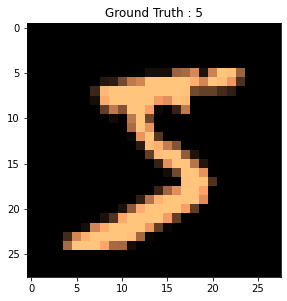

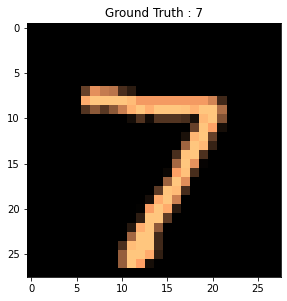

In [9]:
#train
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.imshow(train_x[0, :, :], cmap='copper')
plt.title("Ground Truth : {}".format(train_y[0]))

#test
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.imshow(test_x[0, :, :], cmap='copper')
plt.title("Ground Truth : {}".format(test_y[0]))

In [10]:
#image processing
train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

In [11]:
train_x = train_x/255
test_x = test_x/255

In [12]:
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

In [13]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y_one_hot, 
                    batch_size=256, epochs=10, verbose=True,
                    validation_data=(test_x, test_y_one_hot))

[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)

print(f'Loss = {test_loss}', f'accuracy = {test_acc}')

Epoch 1/10
235/235 [==============================] - 8s 33ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.1160 - val_accuracy: 0.9795
Epoch 2/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.1288 - val_accuracy: 0.9771
Epoch 3/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.0933 - val_accuracy: 0.9841
Epoch 4/10
235/235 [==============================] - 7s 32ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.1108 - val_accuracy: 0.9833
Epoch 5/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.1306 - val_accuracy: 0.9804
Epoch 6/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.1174 - val_accuracy: 0.9817
Epoch 7/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.1226 - val_accuracy: 0.9826

### CNN

In [41]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))


In [37]:
#compile model
opt = tensorflow.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorital_crossentropy', metrics=['accuaracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history_cnn = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64,
                        validation_data=(test_x, test_y_one_hot), verbose=1)

### Transfer Learning

In [42]:
import keras
from tensorflow.keras.applications import EfficientNetB0
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import UpSampling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

In [43]:
efficient_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32,32,3))

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_test = x_test/255

print(x_test.shape)

169017344/169001437 [==============================] - 3s 0us/step
(10000, 32, 32, 3)


In [45]:
train_y_one_hot =  tensorflow.keras.utils.to_categorical(y_train)
test_y_one_hot =  tensorflow.keras.utils.to_categorical(y_test)

In [46]:
model = Sequential()
model.add(efficient_model)

model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.25))
model.add(BatchNormalization())

num_classes = 100
model.add(Dense(num_classes, activation= 'softmax'))

In [47]:
for layer in efficient_model.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True
  else:
    layer.trainable = False

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuaracy'])